In [1]:
## 导入基础 函数库
import numpy as np
import pandas as pd

## 导入画图函数
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 导入决策树模型函数
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



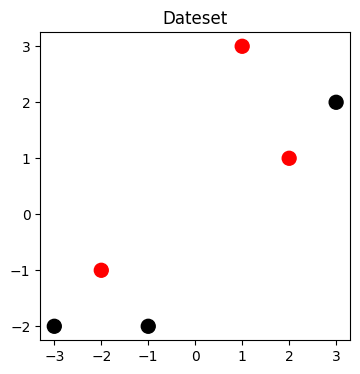

[1 1 1 1 1]


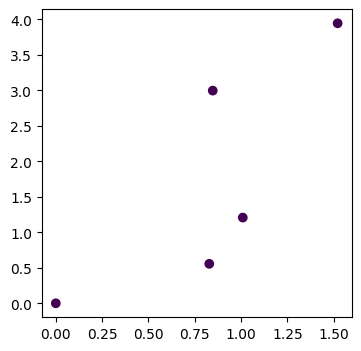

In [3]:
## Demo: LogisticRegression分类
x_fearures = np.array([[-1,-2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 1, 0, 1, 1, 0])

# Model
tree_clf = DecisionTreeClassifier() #可选择criterion="entropy" or"gini"
# Training
tree_clf_1 = tree_clf.fit(x_fearures, y_label) 

# 数据可视化
plt.figure(figsize=(4,4))
plt.scatter(x_fearures[:,0], x_fearures[:,1], c=y_label, s=100, cmap='flag_r')
plt.title('Dateset')
plt.show()

# # 决策树可视化
# import graphviz
# dot_data = tree.export_graphviz(tree_clf, out_file=None)
# graph = graphviz.Source(dot_data)
# graph.render("pengunis")

# 模型预测
import random
x_fearures_pre = np.array([[x1, x2] for i in range(5) for x1,x2 in [(i*random.random(), i*random.random())]])
y_label_pre = tree_clf_1.predict(x_fearures_pre)
print(y_label_pre)
plt.figure(figsize=(4,4))
plt.scatter(x_fearures_pre[:,0],x_fearures_pre[:,1],c=y_label_pre)

In [3]:
## 企鹅数据集的决策树实战
#h获取数据并选择特征
data = pd.read_csv('penguins_raw.csv')
data = data[['Species','Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']]
data.info()
'''
    function "info()" can describe df's information detailly
    other way, using "data[['a','b'...'N']]" to select features needed .
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


'\n    function "info()" can describe df\'s information detailly\n    other way, using "data[[\'a\',\'b\'...\'N\']]" to select features needed .\n'

In [4]:
#处理数据的缺省值
data.isna()
data = data.fillna(-1)
data.info()
'''
    function "isna()" checks out whether the NaNs are included in data;
    function "fillna(x)" uses variable'x' to replace the value of NaN in data.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   344 non-null    float64
 2   Culmen Depth (mm)    344 non-null    float64
 3   Flipper Length (mm)  344 non-null    float64
 4   Body Mass (g)        344 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


'\n    function "isna()" checks out whether the NaNs are included in data;\n    function "fillna(x)" uses variable\'x\' to replace the value of NaN in data.\n'

In [17]:
## 其对应的类别标签为'Adelie Penguin', 'Gentoo penguin', 'Chinstrap penguin'三种不同企鹅的类别。
data['Species'].unique()

"""
    function "unique()" :count the elements that appear uniquely and record unrepeatedly for data["列名"]
    for example: a = [1,2,3,4,1,2,3];  print( a.unique() )
    print out: [ 1, 2, 3, 4 ]
    other one: a = pd.DataFrame([[1,2,3,'1','3'],[2,3,4,'2','4'],[1,2,3,'2','4']], 
                                columns=['num1', 'num2', 'num3','str1','str2'])
                print(a)
                print('a[num1].unique():',a['num1'].unique())
    print out: 
                    num1  num2  num3 str1 str2
                0     1     2     3    1    3
                1     2     3     4    2    4
                2     1     2     3    2    4
                a[num1].unique(): [1 2]
"""

   num1  num2  num3 str1 str2
0     1     2     3    1    3
1     2     3     4    2    4
2     1     2     3    2    4
a[num1].unique(): [1 2]


'\n    function "unique()" :count the elements that appear uniquely and record unrepeatedly for data["列名"]\n    for example: a = [1,2,3,4,1,2,3];  print( a.unique() )\n    print out: [ 1, 2, 3, 4 ]\n    other one: a = pd.Dataframe\n'

In [37]:
## 利用value_counts函数查看每个类别数量
pd.Series(data['Species']).value_counts()
print("data['Species']:")
print(data['Species'].head(),end='\n')
print("pd.Series:")
print(pd.Series(data['Species'].head()))
print("pd.Series(data['Species']).value_counts()")
print(pd.Series(data['Species']).value_counts())

data['Species']:
0    Adelie Penguin (Pygoscelis adeliae)
1    Adelie Penguin (Pygoscelis adeliae)
2    Adelie Penguin (Pygoscelis adeliae)
3    Adelie Penguin (Pygoscelis adeliae)
4    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object
pd.Series:
0    Adelie Penguin (Pygoscelis adeliae)
1    Adelie Penguin (Pygoscelis adeliae)
2    Adelie Penguin (Pygoscelis adeliae)
3    Adelie Penguin (Pygoscelis adeliae)
4    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object
pd.Series(data['Species']).value_counts()
Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64


In [24]:
## 对于特征进行统计学描述
data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,344.000000,344.000000,344.000000,344.000000
mean,43.660756,17.045640,199.741279,4177.319767
std,6.428957,2.405614,20.806759,861.263227
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,39.200000,15.500000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4025.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


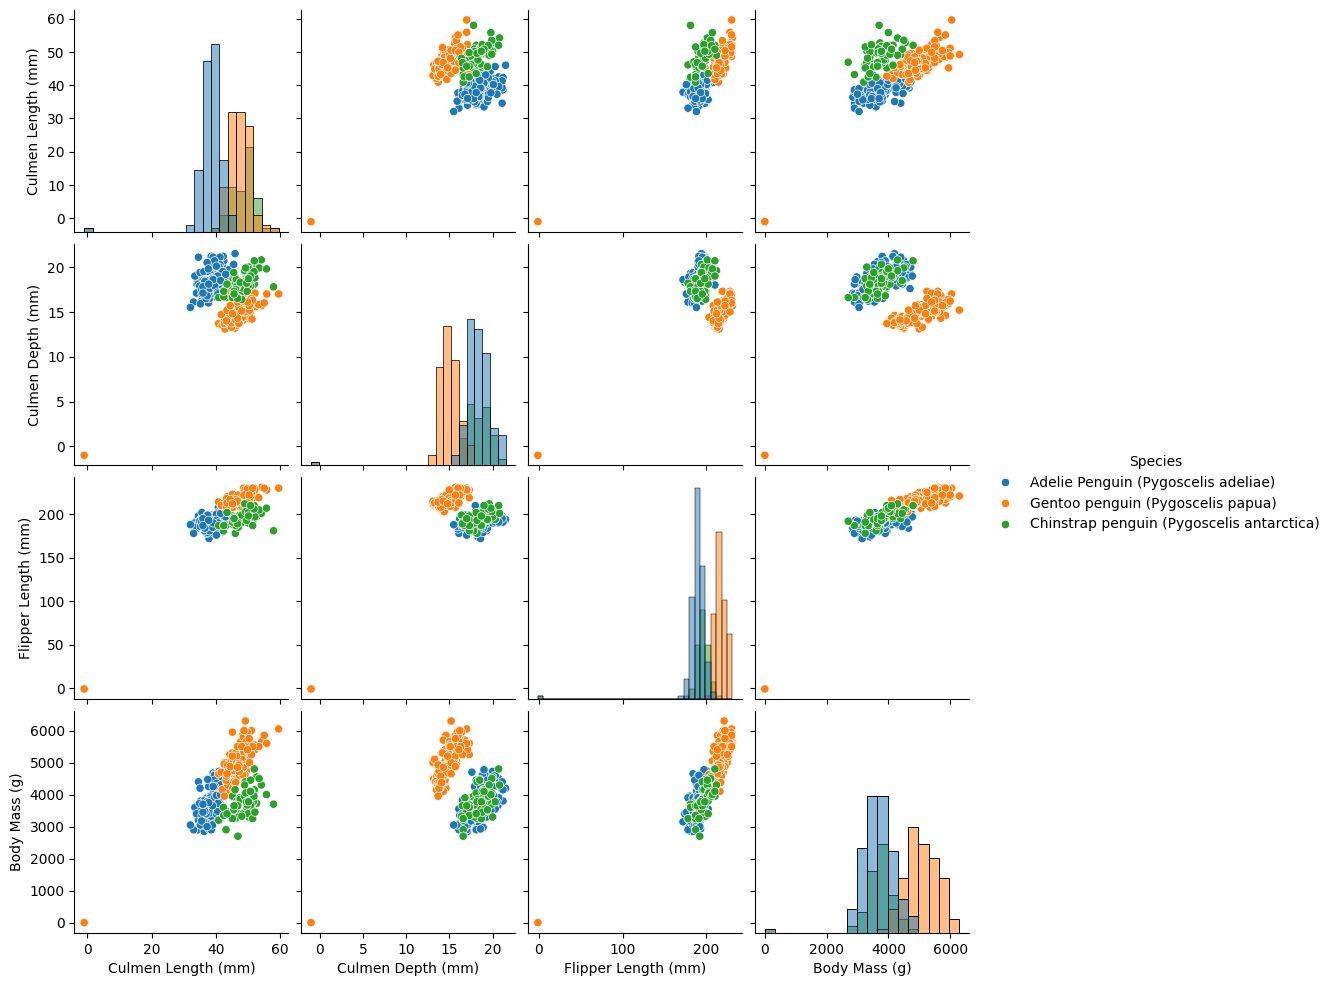

In [25]:
## 特征与标签组合的散点可视化
sns.pairplot(data=data, diag_kind='hist', hue= 'Species')
plt.show()

In [26]:
'''make lebel to num '''
def trans(x):
    if x == data['Species'].unique()[0]:
        return 0
    if x == data['Species'].unique()[1]:
        return 1
    if x == data['Species'].unique()[2]:
        return 2

data['Species'] = data['Species'].apply(trans)


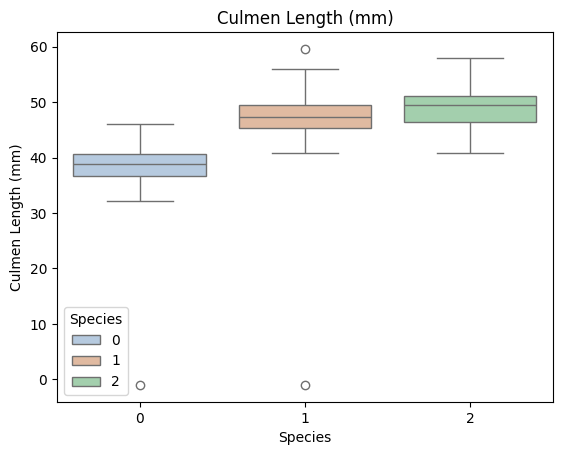

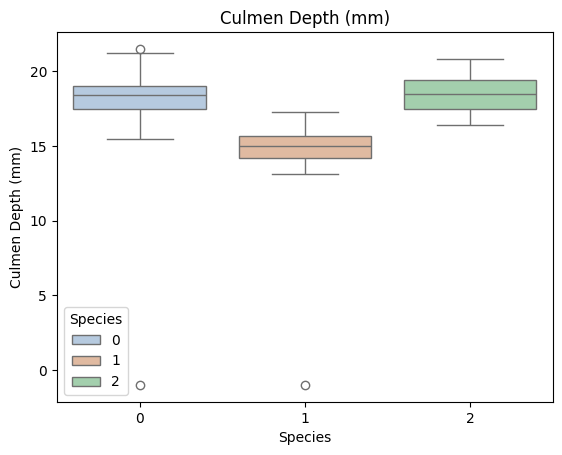

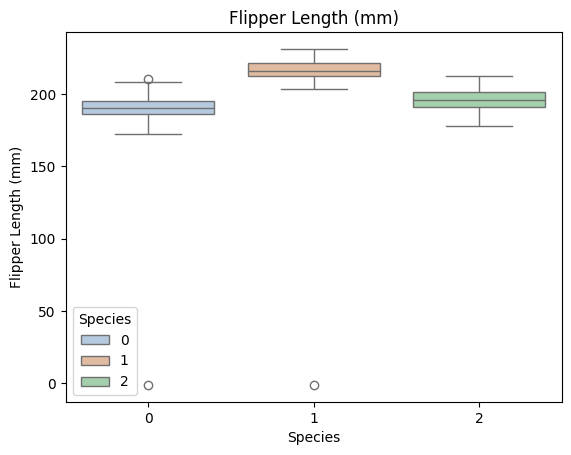

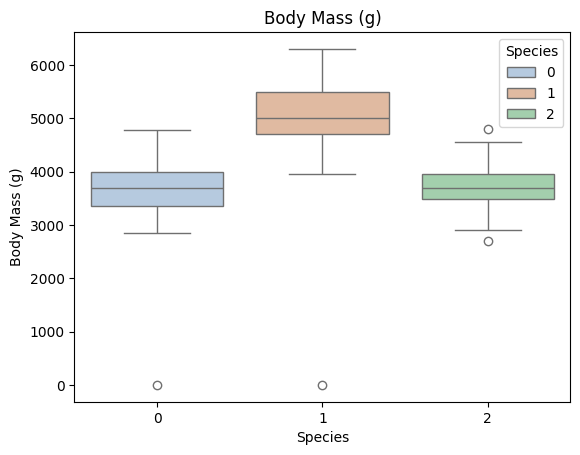

In [34]:
for col in data.columns:
    if col != 'Species':
        sns.boxplot(x='Species', y=col, saturation=0.5, hue='Species', palette='pastel', data=data)
        plt.title(col)
        plt.show()

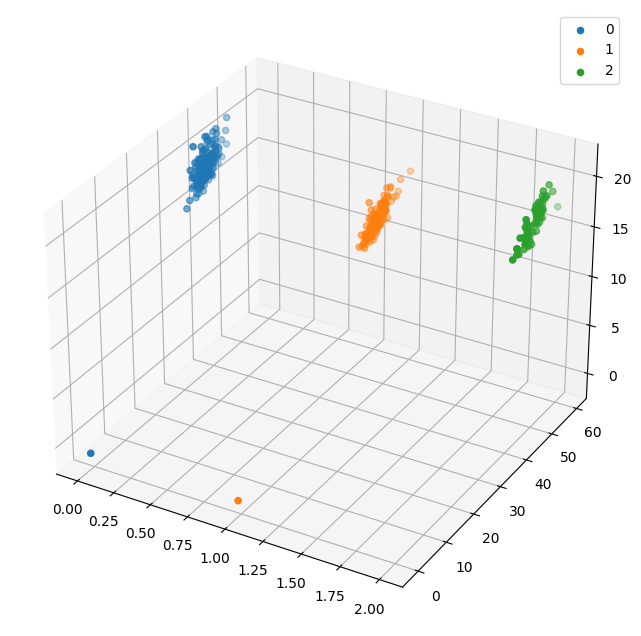

In [35]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

data_class0 = data[data['Species']==0].values
data_class1 = data[data['Species']==1].values
data_class2 = data[data['Species']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(data_class0[:,0], data_class0[:,1], data_class0[:,2],label=data['Species'].unique()[0])
ax.scatter(data_class1[:,0], data_class1[:,1], data_class1[:,2],label=data['Species'].unique()[1])
ax.scatter(data_class2[:,0], data_class2[:,1], data_class2[:,2],label=data['Species'].unique()[2])
plt.legend()

plt.show()

In [49]:
## 为了正确评估模型性能，将数据划分为训练集和测试集
from sklearn.model_selection import train_test_split

#选择类别为1和2 的数据进行分类
data_target_2 = data[data['Species'].isin([0,1])][['Species']]
data_features_2 = data[data['Species'].isin([0,1])][['Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']]

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(data_features_2, 
                                                            data_target_2, 
                                                            test_size=0.2,random_state=2024)

In [53]:
## 定义 决策树模型(信息增益模型)
print(len(x_train_2),len(y_train_2))
clf_2 = DecisionTreeClassifier(criterion='entropy')
clf_2 = clf_2.fit(x_train_2, y_train_2)

220 220


In [125]:
# 测试集验证
y_test_2_pre = np.array(clf_2.predict(x_test_2))
print(y_test_2_pre)
y_test_2_cur = y_test_2['Species'].values #转为【x，x, x, x 】格式
print(y_test_2_cur)
y_test_2_comparison = [[f"{y_test_2_cur[i]}, {y_test_2_pre[i]}"] for i in range(len(y_test_2))]#同类型操作
print(y_test_2_comparison)

[0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0]
[0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0]
[['0, 0'], ['0, 0'], ['0, 0'], ['0, 0'], ['1, 1'], ['0, 0'], ['0, 0'], ['0, 0'], ['0, 0'], ['0, 0'], ['0, 0'], ['0, 0'], ['1, 1'], ['1, 1'], ['0, 0'], ['1, 1'], ['1, 1'], ['0, 0'], ['0, 0'], ['1, 1'], ['0, 0'], ['0, 0'], ['0, 0'], ['0, 0'], ['1, 1'], ['0, 0'], ['0, 0'], ['0, 0'], ['1, 1'], ['0, 0'], ['0, 0'], ['1, 1'], ['0, 0'], ['1, 1'], ['0, 0'], ['0, 0'], ['0, 0'], ['1, 1'], ['1, 1'], ['1, 1'], ['0, 0'], ['1, 1'], ['0, 0'], ['1, 1'], ['1, 1'], ['1, 1'], ['1, 1'], ['1, 1'], ['0, 0'], ['1, 1'], ['0, 0'], ['0, 0'], ['0, 0'], ['0, 0'], ['1, 1'], ['0, 0']]


In [135]:
# 使用内置函数观察预测情况--predict_proba
y_test_2_proba = clf_2.predict_proba(x_test_2)
y_test_2_proba[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

accracy of test_2: 1.0
The confusion matrix result:
 [[35  0]
 [ 0 21]]


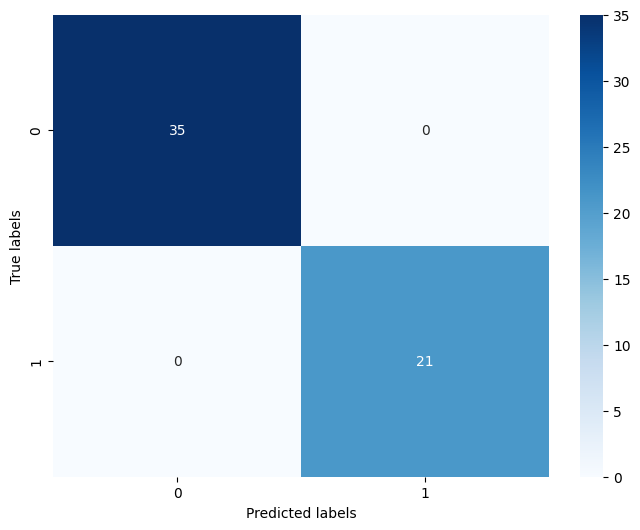

In [139]:
# 利用accuracy（准确度）评估模型效果
from sklearn import metrics
print('accracy of test_2:',metrics.accuracy_score(y_test_2,y_test_2_pre))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_test_2_pre,y_test_2)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化"sns.heatmap"
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [149]:
## 多分类问题
# 划分数据集：训练集、测试集
data_target_3 = data[data['Species'].isin([0,1,2])][['Species']]
data_features_3 = data[data['Species'].isin([0,1,2])][['Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']]
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(data_features_3, data_target_3, test_size=0.3, random_state=2024)

#训练模型
clf_3_gini = DecisionTreeClassifier(criterion='gini')
clf_3_entropy = DecisionTreeClassifier(criterion='entropy')
clf_3_entropy = clf_3_entropy.fit(x_train_3,y_train_3)
clf_3_gini = clf_3_gini.fit(x_train_3,y_train_3)


In [161]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict_gini = clf_3_gini.predict(x_train_3)
test_predict_gini = clf_3_gini.predict(x_test_3)

train_predict_entropy = clf_3_entropy.predict(x_train_3)
test_predict_entropy = clf_3_entropy.predict(x_test_3)

# predict_proba参数
train_predict_proba_gini = clf_3_gini.predict_proba(x_train_3)
test_predict_proba_gini = clf_3_gini.predict_proba(x_test_3)

train_predict_proba_entropy = clf_3_entropy.predict_proba(x_train_3)
test_predict_proba_entropy = clf_3_entropy.predict_proba(x_test_3)
print(train_predict_proba_gini[:5],'\t\n',train_predict_proba_entropy[:5])
# accuracy 参数
print('train_acc_gini:',
      metrics.accuracy_score(y_train_3,train_predict_gini))
print('train_acc_entropy:',
      metrics.accuracy_score(y_train_3,train_predict_entropy))
print('test_acc_gini:',
      metrics.accuracy_score(y_test_3,test_predict_gini))
print('test_acc_entropy:',
      metrics.accuracy_score(y_test_3,test_predict_entropy))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]] 	
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
train_acc_gini: 0.9958333333333333
train_acc_entropy: 0.9958333333333333
test_acc_gini: 0.9711538461538461
test_acc_entropy: 0.9615384615384616


the confusion matrix of test by entropy [[37  0  0]
 [ 0 40  0]
 [ 3  1 23]]
the confusion matrix of test by gini [[38  0  0]
 [ 0 40  0]
 [ 2  1 23]]


Text(0.5, 1.0, 'confusion_matrix_test_gini')

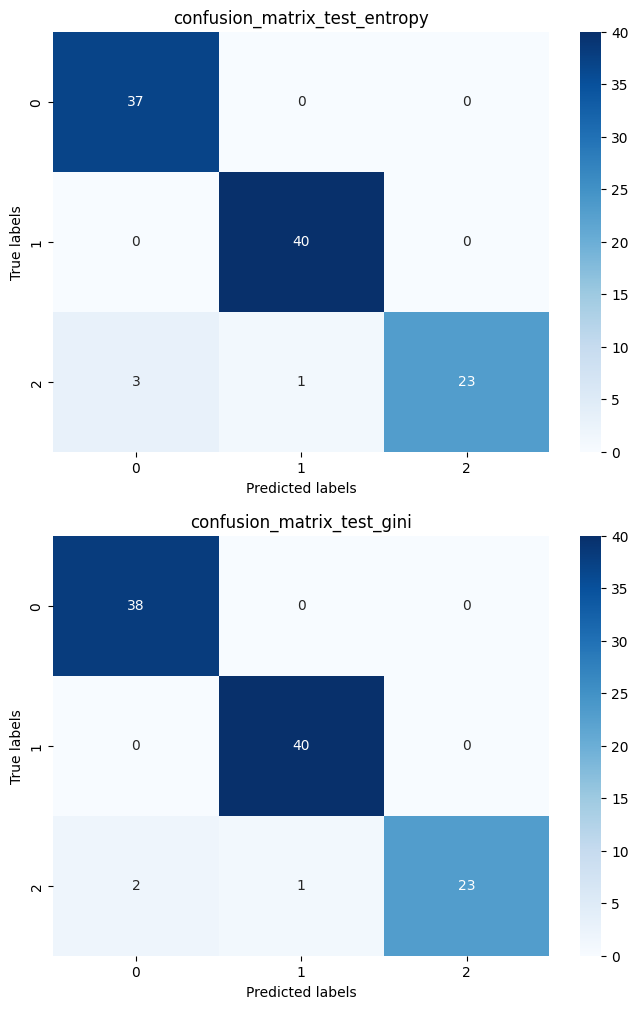

In [174]:
## 查看混淆矩阵
confusion_matrix_test_gini = metrics.confusion_matrix(test_predict_gini,y_test_3)
confusion_matrix_test_entropy = metrics.confusion_matrix(test_predict_entropy,y_test_3)
print("the confusion matrix of test by entropy",confusion_matrix_test_entropy)
print("the confusion matrix of test by gini",confusion_matrix_test_gini)

## 可视化
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
sns.heatmap(confusion_matrix_test_entropy, annot=True, cmap='Blues')#annot显示热力数值
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('confusion_matrix_test_entropy')
plt.subplot(2,1,2)
sns.heatmap(confusion_matrix_test_gini, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('confusion_matrix_test_gini')